<a href="https://colab.research.google.com/github/veda0696-stack/DL-assignment/blob/main/DeepReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

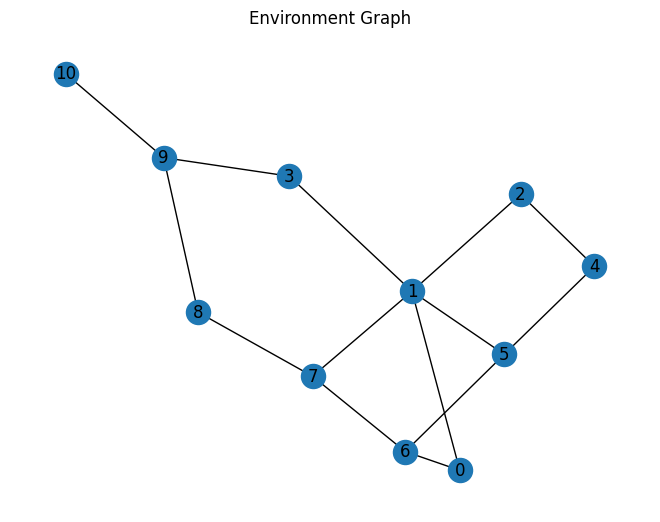

Most Efficient Path:
[0, np.int64(1), np.int64(3), np.int64(9), np.int64(10)]


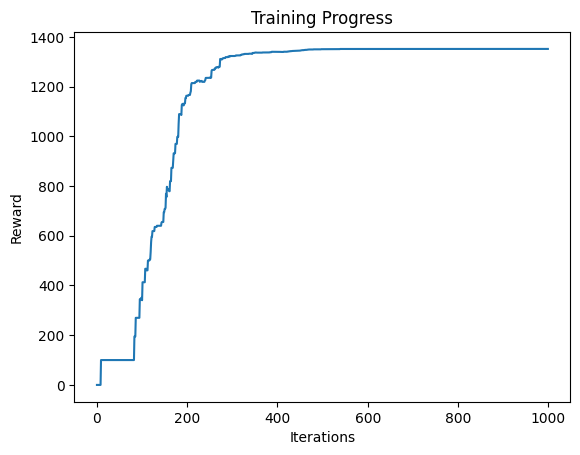


Police Matrix:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  0. 19.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 55.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 38.  0.  0. 49.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 29.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 31.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

Drug Trace Matrix:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 21.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 49.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 41.  0.]
 [ 0.  0.  0. 24.  0.  

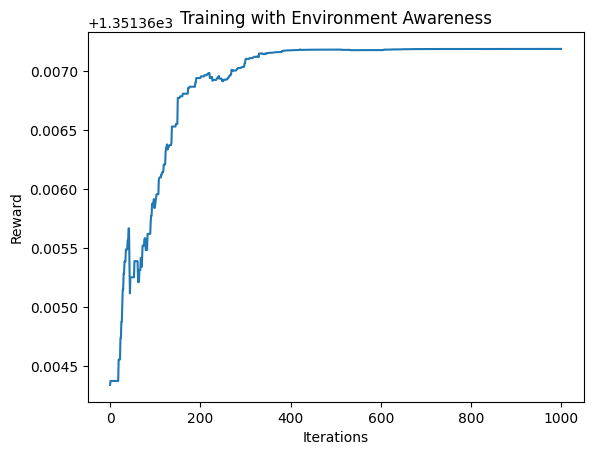

In [1]:
# -*- coding: utf-8 -*-
"""
Optimized Deep Reinforcement Learning (Q-Learning)
Path Finding with Environment Feedback
"""

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

# -----------------------------
# Graph Definition
# -----------------------------
edges = [
    (0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
    (1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
    (8, 9), (7, 8), (1, 7), (3, 9)
]

goal = 10
MATRIX_SIZE = 11

# -----------------------------
# Graph Visualization
# -----------------------------
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.title("Environment Graph")
plt.show()

# -----------------------------
# Reward Matrix Initialization
# -----------------------------
M = np.full((MATRIX_SIZE, MATRIX_SIZE), -1)

for i, j in edges:
    M[i, j] = 100 if j == goal else 0
    M[j, i] = 100 if i == goal else 0

M[goal, goal] = 100

# -----------------------------
# Q Matrix Initialization
# -----------------------------
Q = np.zeros((MATRIX_SIZE, MATRIX_SIZE))

gamma = 0.75
episodes = 1000

# -----------------------------
# Utility Functions
# -----------------------------
def available_actions(state):
    return np.where(M[state] >= 0)[0]

def choose_action(actions):
    return np.random.choice(actions)

def update_q(state, action):
    next_max = np.max(Q[action])
    Q[state, action] = M[state, action] + gamma * next_max
    return np.sum(Q / np.max(Q) * 100) if np.max(Q) > 0 else 0

# -----------------------------
# Training Phase (Basic Q-Learning)
# -----------------------------
scores = []

for _ in range(episodes):
    state = np.random.randint(0, MATRIX_SIZE)
    actions = available_actions(state)
    action = choose_action(actions)
    score = update_q(state, action)
    scores.append(score)

# -----------------------------
# Testing Phase (Optimal Path)
# -----------------------------
state = 0
path = [state]

while state != goal:
    state = np.argmax(Q[state])
    path.append(state)

print("Most Efficient Path:")
print(path)

# -----------------------------
# Reward Plot
# -----------------------------
plt.plot(scores)
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.title("Training Progress")
plt.show()

# -----------------------------
# Environment Knowledge
# -----------------------------
police = [2, 4, 5]
drug_traces = [3, 8, 9]

env_police = np.zeros((MATRIX_SIZE, MATRIX_SIZE))
env_drugs = np.zeros((MATRIX_SIZE, MATRIX_SIZE))

def sense_environment(action):
    result = []
    if action in police:
        result.append('p')
    if action in drug_traces:
        result.append('d')
    return result

def update_with_env(state, action):
    next_max = np.max(Q[action])
    Q[state, action] = M[state, action] + gamma * next_max

    env = sense_environment(action)
    if 'p' in env:
        env_police[state, action] += 1
    if 'd' in env:
        env_drugs[state, action] += 1

    return np.sum(Q / np.max(Q) * 100) if np.max(Q) > 0 else 0

# -----------------------------
# Training with Environmental Help
# -----------------------------
scores_env = []

for _ in range(episodes):
    state = np.random.randint(0, MATRIX_SIZE)
    actions = available_actions(state)

    # Avoid negative Q-values if possible
    q_vals = Q[state, actions]
    if np.any(q_vals >= 0):
        actions = actions[q_vals >= 0]

    action = choose_action(actions)
    score = update_with_env(state, action)
    scores_env.append(score)

# -----------------------------
# Final Outputs
# -----------------------------
print("\nPolice Matrix:")
print(env_police)

print("\nDrug Trace Matrix:")
print(env_drugs)

plt.plot(scores_env)
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.title("Training with Environment Awareness")
plt.show()
